<a href="https://colab.research.google.com/github/madhumaram/microservicesfirstproject/blob/master/autoencoder_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST dataset can be conveniently imported through Keras .

In [1]:
from keras.datasets import mnist 
import numpy as np
from matplotlib import pyplot as plt

The MNIST dataset comprises 70,000 28X28 pixels images of handwritten digits and 70,000 vectors containing information on which digit each one is. The image training data is scaled from [0, 255] to [0,1] to allow for use of the sigmoid activation function.

In [2]:
(X_train, y_train), (X_test, y_train) = mnist.load_data() 
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

11490434/11490434 [==============================] - 0s 0us/step


To check our data, we’ll plot the first image in the training dataset.
In the code cell below, fill in the ellipsis by passing the correct index to retrieve the desired image. Keep in mind that Python starts counting from 0!

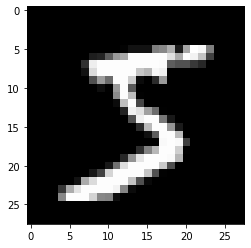

In [3]:
plt.imshow(X_train[0], cmap = "gray") 
plt.show()

***Single-Layer Autoencoder***


We start by considering a simple autoencoder with only one hidden layer.
We know that our data comes in 28X28 pixel format. Run the code cell below to verify this.

In [4]:
print(X_train.shape) 
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


We start by reshaping our X data in a convenient format for our model by flattening our images into a 28X28 = 784 array.

In [8]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:]))) 
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

Following what we did above, print the shape of the reshaped data.

In [11]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


***Defining the Autoencoder***

We're now ready to define our autoencoder.
In the code cell below, assign to the variable input_size the dimension of the reshaped X data.
Next, we set the size of the bottleneck representation (the output of the encoder), as latent_size equal to 10.

In [35]:
input_size = 784 
latent_size = 10

Finally, we are ready to define the various parts that constitute the autoencoder. 
Run the code cell below to import the necessary libraries and modules.

In [30]:
from keras.models import Model
from keras.layers import Dense, Input

As the last step, we want to initialize and run our model.
In the code cell below, we define our autoencoder, compile it and fit it to our model.
In the function compile , fill in the ellipssis by setting the argument optimize equal to "adam" . Finally, set the number of epochs equal to 5.
When you are done, run the code cell below to start your model!

In [31]:
input_img = Input(shape=(input_size,)) # input
latent_rep = Dense(latent_size, activation='relu')(input_img) #encoding definition
output_img = Dense(input_size, activation='sigmoid')(latent_rep) #deco ding definition

In [32]:
autoencoder = Model(input_img, output_img) 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1533
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0962
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0883
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0868
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0863


***Visualizing our Results***

In the code cell below, we have defined an auxiliary function to visualize our results. The first part of the function plots the original data from the dataset, and the second one displays the autoencoded images.

In [33]:
def plot_autoencoder_outputs(autoencoder, n, dims): 
    decoded_imgs = autoencoder.predict(X_test)
    # number of example digits to show
    n=5
    plt.figure(figsize=(10, 4.5)) 
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1) 
        plt.imshow(X_test[i].reshape(*dims)) 
        plt.gray()
        if i == n/2:
            ax.set_title('Original Images')
        # plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n) 
        plt.imshow(decoded_imgs[i].reshape(*dims)) 
        plt.gray()
        if i == n/2:
            ax.set_title('Reconstructed Images')
            plt.show()

Finally, run the code cell below to visualize the results.

313/313 [==============================] - 1s 2ms/step


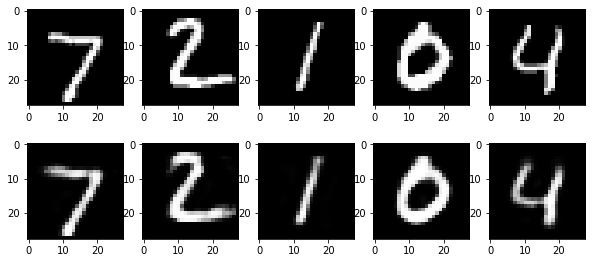

In [34]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))

***Multi-Layer Autoencoder***

In the final part of this activity, we will redefine our encoder to have multiple layers. This is usually what happens in real life.
In the code cell below, we define the input and output size as above. Note that in addition, we also define the size of the hidden layers in each of the multilayer encoder and decoder, as hidden_size .
Here we return to the smaller latent_size , to see how the more complex encoder and decoder might work, even with the smaller sized bottleneck.

In [36]:
input_size = 784 
hidden_size = 128
latent_size = 10

Next, in a similar way as we did above, we use the function Dense to define the various layers. Note that we now have multiple (2) hidden layers that use a ReLU function as activation.

In [37]:
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img) 
latent_rep = Dense(latent_size, activation='relu')(hidden_1) 
hidden_2 = Dense(hidden_size, activation='relu')(latent_rep) 
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

As a last step, as we did above, we want to define our autoencoder, compile it and fit it to our model. 

In the function compile , fill in the ellipsis by setting the argument optimize equal to "adam" . 

Finally, set the number of epochs equal to 5, the same as with the single layer autoencoder.

When you are done, run the code cell below to start your model!

In [38]:
autoencoder = Model(input_img, output_img) 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1667
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1339
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1258
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1213
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1188


Finally, we use the same auxiliary plotting function to see how well we did.

313/313 [==============================] - 1s 3ms/step


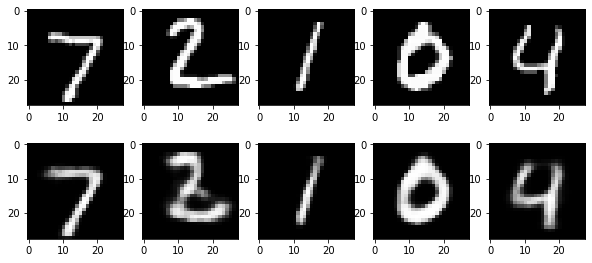

In [39]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))